This is a data visualization exercise using Pandas plotting and matplotlib. The purpose is to make quick iterative plots for Exploratory Data Analysis.

References:
- https://towardsdatascience.com/5-minute-guide-to-plotting-with-pandas-e8c0f40a1df4
- https://github.com/justmarkham/DAT8/blob/master/notebooks/05_pandas_visualization.ipynb

In [18]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['TARGET'] = pd.Series(boston.target)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'FREQUENCY')

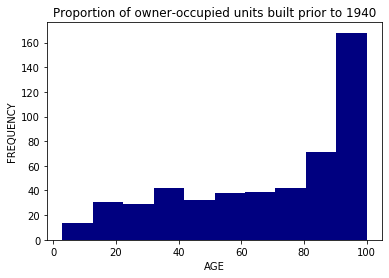

In [20]:
#visualize age
boston_df["AGE"].plot(kind="hist",title="Proportion of owner-occupied units built prior to 1940", colormap = "jet")
plt.xlabel('AGE')
plt.ylabel('FREQUENCY')

In [27]:
#visualizing correlations
correlations = boston_df.corr()

In [28]:
correlations['TARGET']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
TARGET     1.000000
Name: TARGET, dtype: float64

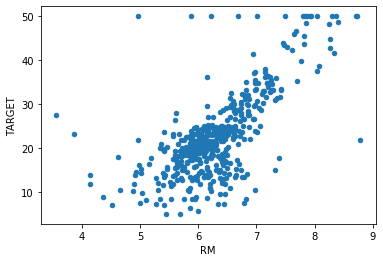

In [22]:
#visualize relationship between RM and Target due to high correlation
boston_df.plot(kind="scatter",x="RM",y="TARGET")

In [56]:
#Visualize differences between 2 set of variables: "CHAS" = 1, "CHAS" = 0
boston_df.groupby("CHAS").head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,1.0,0.871,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0


0.0         AxesSubplot(0.1,0.15;0.363636x0.75)
1.0    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

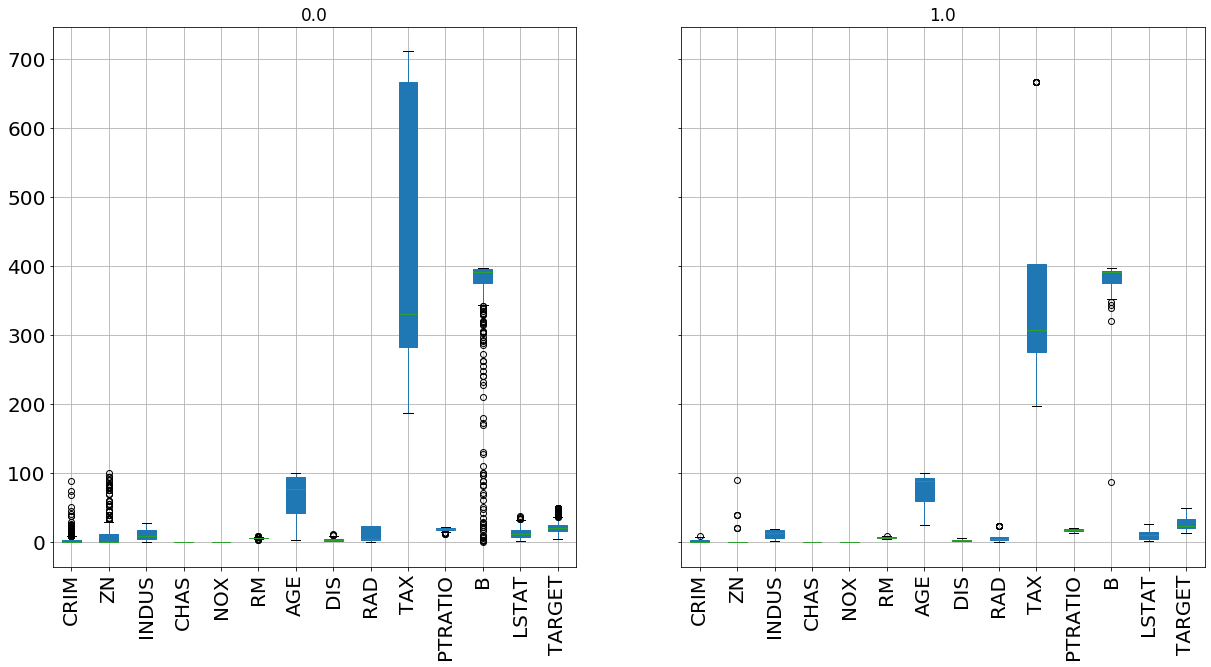

In [85]:
boston_df.groupby('CHAS').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

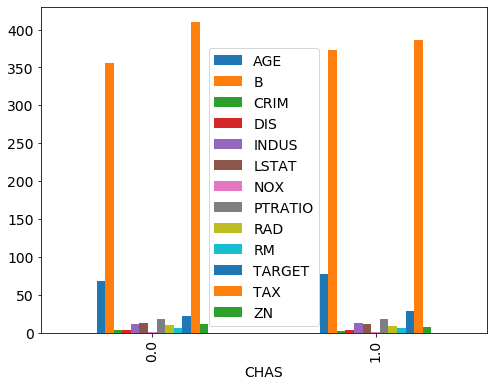

In [84]:
#Trying another way of aggregating and visualizing, using pivot table
boston_df.pivot_table(index="CHAS").plot(kind = "bar")

In [86]:
#let's try visualizing with another dataset

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

# read in the drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

In [87]:
drinks.head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [88]:
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [89]:
#pivot table can aggregate the same way as groupby, but in a different order
drinks.pivot_table(index="continent",values=["beer","spirit","wine","liters"])

,beer,liters,spirit,wine
continent,,,,
AF,61.471698,3.007547,16.339623,16.264151
AS,37.045455,2.170455,60.840909,9.068182
EU,193.777778,8.617778,132.555556,142.222222
NA,145.434783,5.995652,165.739130,24.521739
OC,89.687500,3.381250,58.437500,35.625000
SA,175.083333,6.308333,114.750000,62.416667


Text(0, 0.5, 'Average Alcohol Consumption (Litres)')

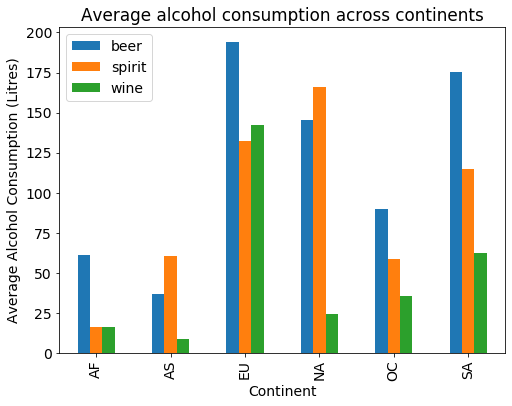

In [114]:
#one possible workflow: aggregate data using pivot table, and then plot clustered graph to compare across continent
drinks.pivot_table(index="continent",values=["beer","spirit","wine","liters"]).drop("liters",axis=1).plot(kind="bar", title = "Average alcohol consumption across continents", figsize = (8,6))
plt.xlabel("Continent")
plt.ylabel("Average Alcohol Consumption (Litres)")

In [100]:
#detecting outliers
drinks.describe()

,beer,spirit,wine,liters
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


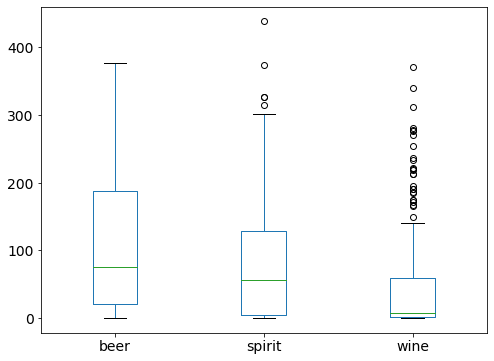

In [99]:
drinks.drop("liters",axis=1).plot(kind="box")

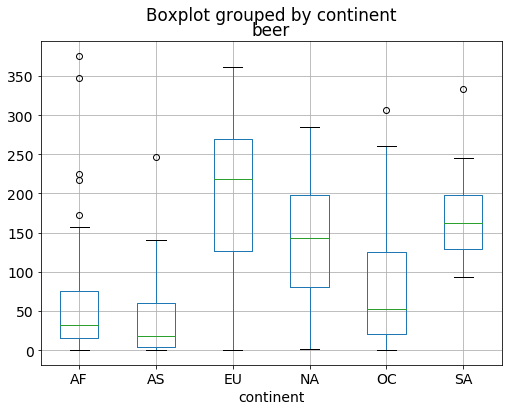

In [106]:
drinks.boxplot(column = "beer", by = "continent")